In [1]:
import pandas as pd
data = pd.read_csv('Sample_Data.csv')
n = len(data)

/Users/avinashsidhu/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
data['Text'] = data['Title']+' '+data['Description']
data

,ID,Latitude,Longitude,Title,Description,Text
0,1,20.5,78.9,Fire at House,A major fire broke up in the building,Fire at House A major fire broke up in the bui...
1,2,20.5,78.9,Fire at House,A fire broke up in the building,Fire at House A fire broke up in the building
2,3,25.0,65.0,Road accident at highway,Highway blocked after collision,Road accident at highway Highway blocked after...
3,4,25.0,65.0,Road accident at highway,Highway blocked after cars collision,Road accident at highway Highway blocked after...
4,5,35.0,77.0,Road accident,Main Highway blocked after collision,Road accident Main Highway blocked after colli...
5,6,40.0,60.0,Knife assault,One person injured after a knife attack,Knife assault One person injured after a knife...
6,7,30.5,88.9,Fire at House,A major fire broke up in the building,Fire at House A major fire broke up in the bui...
7,8,40.0,60.0,Knife attack,Man injured after a knife attack,Knife attack Man injured after a knife attack
8,9,30.5,88.9,Fire at House,A major fire broke up in the building,Fire at House A major fire broke up in the bui...
9,10,30.5,88.9,Fire at House,A fire broke up in the building,Fire at House A fire broke up in the building


In [3]:
import re
data['Text'] = [re.findall(r'\w+', i.lower()) for i in data['Text']]

In [4]:
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords
stopwords_eng = stopwords.words('english')  
new_data = []
for sentence in data['Text']:
    temp = []
    for word in sentence:
        if word not in stopwords_eng and not word.isdigit():
            temp.append(word)
    
    new_data.append(temp) 
    
data['Text'] = new_data
data

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/avinashsidhu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Latitude,Longitude,Title,Description,Text
0,1,20.5,78.9,Fire at House,A major fire broke up in the building,"[fire, house, major, fire, broke, building]"
1,2,20.5,78.9,Fire at House,A fire broke up in the building,"[fire, house, fire, broke, building]"
2,3,25.0,65.0,Road accident at highway,Highway blocked after collision,"[road, accident, highway, highway, blocked, co..."
3,4,25.0,65.0,Road accident at highway,Highway blocked after cars collision,"[road, accident, highway, highway, blocked, ca..."
4,5,35.0,77.0,Road accident,Main Highway blocked after collision,"[road, accident, main, highway, blocked, colli..."
5,6,40.0,60.0,Knife assault,One person injured after a knife attack,"[knife, assault, one, person, injured, knife, ..."
6,7,30.5,88.9,Fire at House,A major fire broke up in the building,"[fire, house, major, fire, broke, building]"
7,8,40.0,60.0,Knife attack,Man injured after a knife attack,"[knife, attack, man, injured, knife, attack]"
8,9,30.5,88.9,Fire at House,A major fire broke up in the building,"[fire, house, major, fire, broke, building]"
9,10,30.5,88.9,Fire at House,A fire broke up in the building,"[fire, house, fire, broke, building]"


In [5]:
nltk.download('wordnet')
nltk.download('words')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
new_data = []
for sentence in data['Text']:
    temp = []
    for word in sentence:
        temp.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
    new_data.append(temp) 
    
data['Text'] = new_data
data['Text'] = [' '.join(i) for i in data['Text']]

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/avinashsidhu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/avinashsidhu/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(1, 2), min_df=0)
matrix = tf.fit_transform(data['Text'])

In [7]:
from sklearn.metrics.pairwise import linear_kernel
sim_matrix = linear_kernel(matrix, matrix)
sim_matrix

array([[1.        , 0.7512291 , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.7512291 ],
       [0.7512291 , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.7512291 , 0.        , 0.7512291 , 1.        ],
       [0.        , 0.        , 1.        , 0.79602874, 0.6731896 ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.79602874, 1.        , 0.50836487,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.6731896 , 0.50836487, 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.55811606, 0.        , 0.        ],
       [1.        , 0.7512291 , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.7512291 ],
       [0.        , 0.        , 0.       

In [8]:
from math import sin, cos, sqrt, atan2, radians
R = 6373.0

for i in range(n):
    for j in range(n):
        lat1 = radians(data.iloc[i]['Latitude'])
        lon1 = radians(data.iloc[i]['Longitude'])
        lat2 = radians(data.iloc[j]['Latitude'])
        lon2 = radians(data.iloc[j]['Longitude'])
        
        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance = R * c #Distance in kms
        
        if distance > 0.2:
            sim_matrix[i][j] = 0
sim_matrix

array([[1.        , 0.7512291 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.7512291 , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.79602874, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.79602874, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.55811606, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.7512291 ],
       [0.        , 0.        , 0.       

In [9]:
from sklearn.cluster import DBSCAN
data['Cluster_Code'] = DBSCAN(eps=0.7, min_samples=1).fit_predict(sim_matrix)

In [10]:
data

,ID,Latitude,Longitude,Title,Description,Text,Cluster_Code
0,1,20.5,78.9,Fire at House,A major fire broke up in the building,fire house major fire break build,0
1,2,20.5,78.9,Fire at House,A fire broke up in the building,fire house fire break build,0
2,3,25.0,65.0,Road accident at highway,Highway blocked after collision,road accident highway highway block collision,1
3,4,25.0,65.0,Road accident at highway,Highway blocked after cars collision,road accident highway highway block cars colli...,1
4,5,35.0,77.0,Road accident,Main Highway blocked after collision,road accident main highway block collision,2
5,6,40.0,60.0,Knife assault,One person injured after a knife attack,knife assault one person injure knife attack,3
6,7,30.5,88.9,Fire at House,A major fire broke up in the building,fire house major fire break build,4
7,8,40.0,60.0,Knife attack,Man injured after a knife attack,knife attack man injure knife attack,3
8,9,30.5,88.9,Fire at House,A major fire broke up in the building,fire house major fire break build,4
9,10,30.5,88.9,Fire at House,A fire broke up in the building,fire house fire break build,4


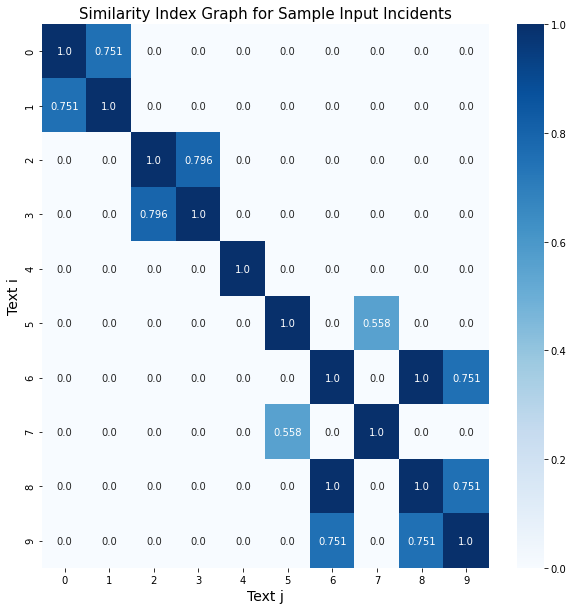

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
ax = sns.heatmap(sim_matrix, annot=True, fmt=".3", cmap="Blues");
plt.xlabel('Text j', fontsize=14)
plt.ylabel('Text i', fontsize=14)
plt.title('Similarity Index Graph for Sample Input Incidents', fontsize=15);